In [2]:
#ARIMA
#Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

#Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo ARMA.

#AR: Autoregression : Um modelo que usa a relação dependende entre uma observação e alguns lags.

#I: Integrated : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

#MA: Moving Average : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

#   residual error = expected − predicted
#Isso é diferente de Moving Average Smoothing.

#Erros residuais contém estruturas temporais que podem ser modeladas.
#Existem sinais complexos nos erros residuais.
#Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.
#O modelo arima contém alguns parâmetros

# ARIMA(p,d,q)
#p: O número de lags que foram devem ser incluídos no modelo.
#d: O número de vezes que as observações serão diferenciadas.
#q: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [25]:
import pandas as pd 
series = pd.read_csv('base_ipca.csv', encoding='UTF-8', sep=',', index_col=0)
series = pd.DataFrame(series['IPCA Acumulado 12 meses'])
series = series.dropna()

In [9]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [10]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

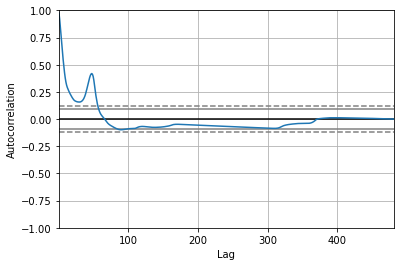

In [26]:
# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()

In [27]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

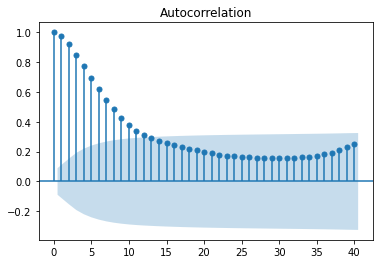

In [28]:
plot_acf(series, lags=40)
pyplot.show()

In [29]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [30]:
# ARIMA(p,d,q)
model = ARIMA(series, order=(7,1,1))

C:\Users\emers\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\emers\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [31]:
model_fit = model.fit()

In [32]:
# summary 
print(model_fit.summary())

                                 ARIMA Model Results                                 
Dep. Variable:     D.IPCA Acumulado 12 meses   No. Observations:                  480
Model:                        ARIMA(7, 1, 1)   Log Likelihood               -3032.740
Method:                              css-mle   S.D. of innovations            133.978
Date:                       Fri, 12 Feb 2021   AIC                           6085.480
Time:                               15:54:28   BIC                           6127.218
Sample:                           01-01-1981   HQIC                          6101.886
                                - 12-01-2020                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.4568      3.662     -0.125      0.901      -7.635       6.721
ar.L1.D.IPCA

In [33]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

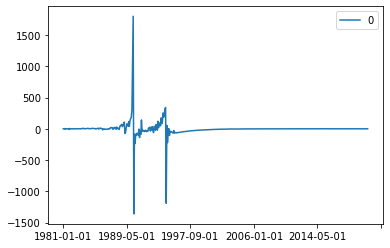

In [34]:
residuals.plot()
pyplot.show()

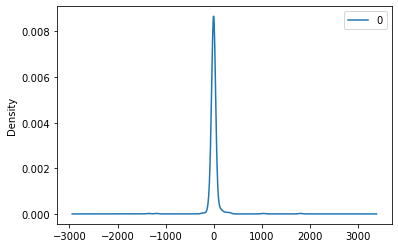

In [35]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [36]:
# estatística descritiva dos residuos
print(residuals.describe())

                 0
count   480.000000
mean      0.367941
std     134.119432
min   -1361.449322
25%      -6.346455
50%       0.285994
75%       1.033361
max    1801.744790


In [37]:
#Prevendo dados com ARIMA utilizando Walk Forward

#Separando os dados de treino e teste

In [38]:
# a variável X recebe os dados da série
X = series.values
X = X.astype('float32')

In [39]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [40]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [41]:
# cria a variável history
history = [x for x in train]

In [42]:
# cria lista de previsões
predictions = list()

In [43]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [44]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [45]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=-1.923, Valor esperado=  6
Valor predito=16.695, Valor esperado=  6
Valor predito=-2.881, Valor esperado=  6
Valor predito=16.025, Valor esperado=  6
Valor predito=-2.775, Valor esperado=  7
Valor predito=15.814, Valor esperado=  7
Valor predito=-2.224, Valor esperado=  7
Valor predito=16.597, Valor esperado=  7
Valor predito=-1.647, Valor esperado=  6
Valor predito=15.787, Valor esperado=  6
Valor predito=-2.643, Valor esperado=  7
Valor predito=15.784, Valor esperado=  8
Valor predito=-2.163, Valor esperado=  8
Valor predito=15.720, Valor esperado=  8
Valor predito=-1.789, Valor esperado=  8
Valor predito=15.706, Valor esperado=  8
Valor predito=-1.308, Valor esperado=  8
Valor predito=16.296, Valor esperado=  8
Valor predito=-1.138, Valor esperado=  8
Valor predito=15.814, Valor esperado=  8
Valor predito=-1.858, Valor esperado=  7
Valor predito=15.745, Valor esperado=  8
Valor predito=-0.588, Valor esperado=  8
Valor predito=16.617, Valor esperado= 11
Valor predito=2.

In [46]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.741


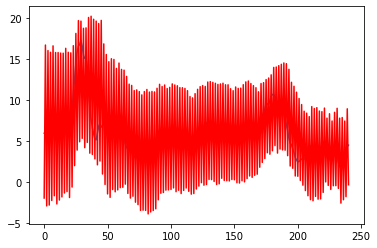

In [47]:
# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [48]:

#Analisando Resíduos
#  Erro Residual = Valor esperado − Valor Predito

#Erros residuais são erros em previsões de séries temporais.
#Uma análise dos erros pode sugerir melhoras no modelo.
#Tendências.
#Sazonalidades.

In [49]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [50]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [51]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,7.892599
1,-10.775164
2,9.151054
3,-9.584555
4,9.385313


In [52]:

# estatística descritiva
residuals.describe()

,0
count,241.000000
mean,-0.069158
std,6.754783
min,-14.458746
25%,-5.937930
50%,1.734002
75%,5.941317
max,11.937607


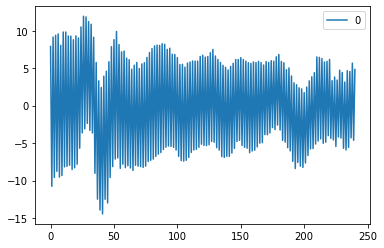

In [53]:
# plot residuals
residuals.plot()
pyplot.show()

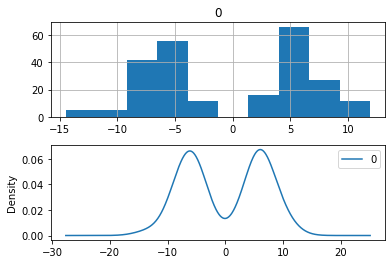

In [54]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [55]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

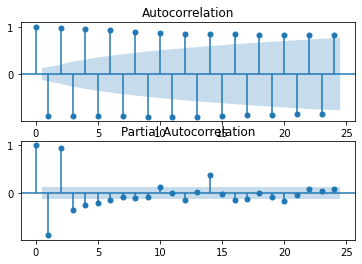

In [56]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()